<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/HumanDetectionInImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 !pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tvishavishalshah","key":"87425dfd703c2442f3b34c7020b8e6b7"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download constantinwerner/human-detection-dataset

 95% 247M/260M [00:02<00:00, 156MB/s]
100% 260M/260M [00:02<00:00, 117MB/s]


In [8]:
! unzip human-detection-dataset.zip

Archive:  human-detection-dataset.zip
  inflating: human detection dataset/0/0.png  
  inflating: human detection dataset/0/1.png  
  inflating: human detection dataset/0/10.png  
  inflating: human detection dataset/0/100.png  
  inflating: human detection dataset/0/101.png  
  inflating: human detection dataset/0/102.png  
  inflating: human detection dataset/0/103.png  
  inflating: human detection dataset/0/104.png  
  inflating: human detection dataset/0/105.png  
  inflating: human detection dataset/0/106.png  
  inflating: human detection dataset/0/107.png  
  inflating: human detection dataset/0/108.png  
  inflating: human detection dataset/0/109.png  
  inflating: human detection dataset/0/11.png  
  inflating: human detection dataset/0/110.png  
  inflating: human detection dataset/0/111.png  
  inflating: human detection dataset/0/112.png  
  inflating: human detection dataset/0/113.png  
  inflating: human detection dataset/0/114.png  
  inflating: human detection dataset/

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras import layers, models

In [10]:
dataset_dir = 'human detection dataset'

without_human_dir = os.path.join(dataset_dir, '0')
with_human_dir = os.path.join(dataset_dir, '1')


In [11]:
# List the filenames of images in each directory
without_human_images = [os.path.join(without_human_dir, filename) for filename in os.listdir(without_human_dir)]
with_human_images = [os.path.join(with_human_dir, filename) for filename in os.listdir(with_human_dir)]

# Split the dataset into training and testing sets
train_without_human, test_without_human = train_test_split(without_human_images, test_size=0.2, random_state=42)
train_with_human, test_with_human = train_test_split(with_human_images, test_size=0.2, random_state=42)

# Create directories for training and testing
train_dir = 'human detection dataset/train'
test_dir = 'human detection dataset/test'
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(os.path.join(train_dir, '0'), exist_ok=True)
# os.makedirs(os.path.join(train_dir, '1'), exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(os.path.join(test_dir, '0'), exist_ok=True)
# os.makedirs(os.path.join(test_dir, '1'), exist_ok=True)

# # Move images to appropriate directories for training
# for image_path in train_without_human:
#     shutil.move(image_path, os.path.join(train_dir, '0', os.path.basename(image_path)))

# for image_path in train_with_human:
#     shutil.move(image_path, os.path.join(train_dir, '1', os.path.basename(image_path)))

# # Move images to appropriate directories for testing
# for image_path in test_without_human:
#     shutil.move(image_path, os.path.join(test_dir, '0', os.path.basename(image_path)))

# for image_path in test_with_human:
#     shutil.move(image_path, os.path.join(test_dir, '1', os.path.basename(image_path)))


In [12]:
# # Define ImageDataGenerator for training data with minimal augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255  # Rescale pixel values to [0, 1]
# )

# # Define ImageDataGenerator for testing data with minimal preprocessing
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Define batch size and target image dimensions
# batch_size = 32
# img_height, img_width = 150, 150

# # Create data generators for training and testing sets
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary'   # Use 'binary' for binary classification tasks
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary'   # Use 'binary' for binary classification tasks
# )


# Define ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

# Define ImageDataGenerator for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and testing sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 736 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


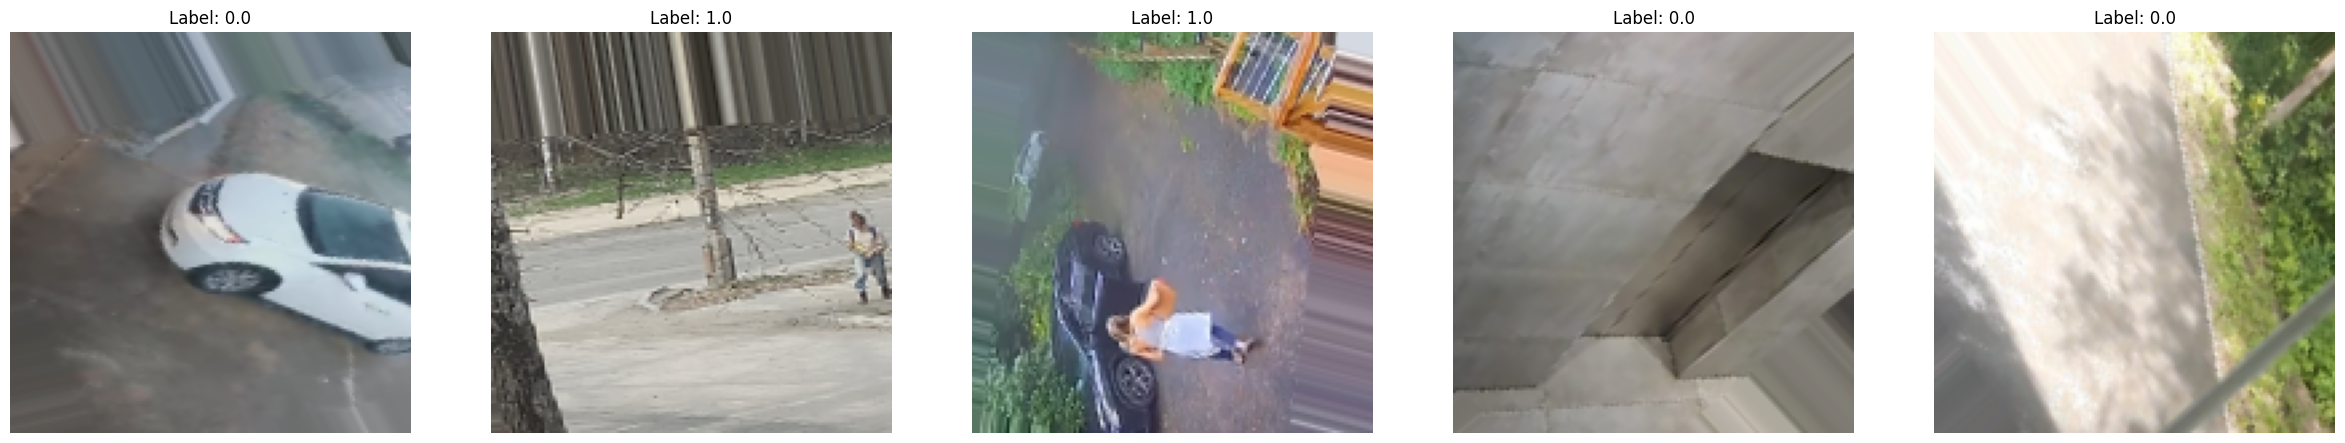

In [13]:
# Get a batch of images from the training generator
sample_images, sample_labels = next(train_generator)

# Define a function to plot sample images
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(30, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title('Label: {}'.format(labels[i]))
        plt.axis('off')
    plt.show()

# Plot sample images
plot_sample_images(sample_images, sample_labels)


In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (human or non-human)
])
# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [16]:
# # Define the number of epochs
# epochs = 15  # You can adjust this number based on the training performance

# # Train the model
# history = model.fit(train_generator,
#                     steps_per_epoch=train_generator.samples // batch_size,
#                     epochs=epochs,
#                     validation_data=test_generator,
#                     validation_steps=test_generator.samples // batch_size)


In [17]:
model.save('cnn_50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
loaded_model = tf.keras.models.load_model('cnn_50.h5')

In [19]:
predictions = loaded_model.predict(test_generator)

6/6 [==============================] - 6s 696ms/step


In [20]:
import numpy as np


In [21]:
filenames = test_generator.filenames
actual_labels = test_generator.classes

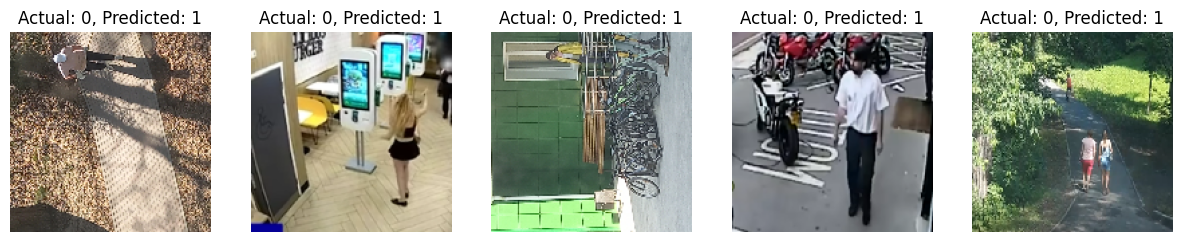

In [22]:
binary_predictions = np.round(predictions)

# Define a function to plot images with their actual and predicted labels
def plot_images_with_labels(generator, filenames, actual_labels, predicted_labels, num_images=5):
    # Get a batch of images and labels from the generator
    images, _ = next(generator)

    # Plot images with actual and predicted labels
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        # Find the index of the current image in the filenames list
        idx = (generator.batch_index - 1) * generator.batch_size + i
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        predicted_label = int(predicted_labels[idx][0])
        plt.title(f"Actual: {actual_labels[idx]}, Predicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot images with actual and predicted labels
plot_images_with_labels(test_generator, filenames, actual_labels, binary_predictions)

In [23]:
import cv2

def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image_uint8 = np.uint8(gray_image * 255)
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image_uint8, (5, 5), 0)

    # Equalize histogram
    equalized_image = cv2.equalizeHist(blurred_image)

    # Morphological operations for noise reduction and edge enhancement
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph_image = cv2.morphologyEx(equalized_image, cv2.MORPH_CLOSE, kernel)

    # Canny edge detection
    edges = cv2.Canny(morph_image, 30, 150)

    # Thresholding to separate foreground and background
    _, binary_image = cv2.threshold(morph_image, 100, 255, cv2.THRESH_BINARY)

    # Return preprocessed image and additional processed images
    return equalized_image, edges, binary_image


In [24]:
# Preprocess training data
preprocessed_train_data = []
for images, labels in train_generator:
    for image in images:
        preprocessed_image = preprocess_image(image)
        preprocessed_train_data.append(preprocessed_image)

# Preprocess testing data
preprocessed_test_data = []
for images, labels in test_generator:
    for image in images:
        preprocessed_test_image = preprocess_image(image)
        preprocessed_test_data.append(preprocessed_test_image)

# Convert preprocessed data to numpy arrays
preprocessed_train_data = np.array(preprocessed_train_data)
preprocessed_test_data = np.array(preprocessed_test_data)

# Reshape data if necessary (e.g., for convolutional neural networks)
preprocessed_train_data = preprocessed_train_data.reshape(preprocessed_train_data.shape[0], preprocessed_train_data.shape[1], preprocessed_train_data.shape[2], 1)
preprocessed_test_data = preprocessed_test_data.reshape(preprocessed_test_data.shape[0], preprocessed_test_data.shape[1], preprocessed_test_data.shape[2], 1)

# Make predictions using the saved model
predictions = loaded_model.predict(preprocessed_test_data)


KeyboardInterrupt: 

In [26]:
def preprocess_generator(generator, batch_size):
    preprocessed_data = []
    for i in range(len(generator)):
        batch_images, _ = generator[i]
        preprocessed_batch = [preprocess_image(image) for image in batch_images]
        preprocessed_data.extend(preprocessed_batch)
    return preprocessed_data

# Example usage for training data
train_batch_size = 10
preprocessed_train_data = preprocess_generator(train_generator, train_batch_size)

# Example usage for testing data
test_batch_size = 10
preprocessed_test_data = preprocess_generator(test_generator, test_batch_size)

In [27]:
def preprocess_all_images(generator):
    preprocessed_data = []
    num_samples = len(generator)
    for i in range(num_samples):
        batch_images, _ = generator[i]
        preprocessed_batch = [preprocess_image(image) for image in batch_images]
        preprocessed_data.extend(preprocessed_batch)
    return preprocessed_data

# Example usage for training data
preprocessed_train_data = preprocess_all_images(train_generator)

# Example usage for testing data
preprocessed_test_data = preprocess_all_images(test_generator)

In [35]:
print(preprocessed_train_data[0])

(array([[ 55,  55,  55, ..., 225, 225, 225],
       [ 58,  58,  58, ..., 231, 231, 231],
       [ 58,  58,  58, ..., 239, 239, 239],
       ...,
       [ 87,  87,  87, ..., 230, 230, 230],
       [ 87,  87,  87, ..., 230, 230, 230],
       [ 87,  87,  87, ..., 230, 230, 230]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8))


In [44]:
preprocessed_images_train = np.array([image for image, _, _ in preprocessed_train_data])
preprocessed_images_test = np.array([image for image, _, _ in preprocessed_test_data])

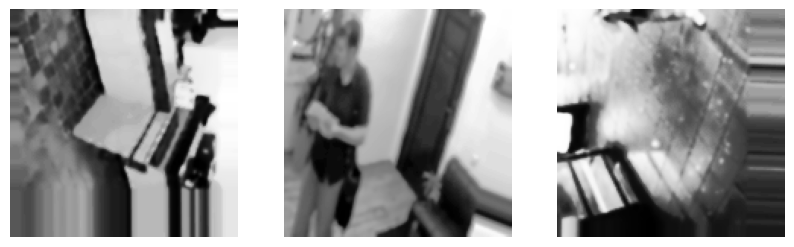

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for i, image in enumerate(preprocessed_images_train[:3]):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
plt.show()

In [46]:
# Define the number of epochs
epochs = 20  # You can adjust this number based on the training performance

# Train the model
# history = model.fit(preprocessed_images_train,
#                     epochs=epochs,
#                     validation_data=preprocessed_images_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()